In [1]:

!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from utils import *

In [3]:
!pip install fastai

from fastai.vision.all import *
path = untar_data(URLs.PETS)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
Path.BASE_PATH = path

In [5]:

path.ls()
(path/"images").ls()

(#7393) [Path('images/english_setter_142.jpg'),Path('images/boxer_120.jpg'),Path('images/english_setter_62.jpg'),Path('images/newfoundland_106.jpg'),Path('images/great_pyrenees_15.jpg'),Path('images/american_pit_bull_terrier_170.jpg'),Path('images/japanese_chin_165.jpg'),Path('images/pug_128.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/basset_hound_154.jpg')...]

In [6]:
fname = (path/"images").ls()[0]
fname

Path('images/english_setter_142.jpg')

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['english_setter']

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")
dls

In [ ]:
torch.cuda.is_available()

True

In [ ]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.514486,0.324830,0.100812,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.519585,0.348379,0.105548,01:13
1,0.326096,0.252765,0.079161,01:12


In [ ]:
x,y = dls.one_batch()
y

TensorCategory([ 9, 35, 25, 24, 23, 30,  1, 29, 19, 35,  9, 25, 35, 12, 27, 21,
                 4,  5, 18, 23, 35, 30, 10,  7, 21, 32, 29, 24, 12, 13, 19, 32,
                32, 29,  9, 25, 11, 17,  6, 21, 29,  0, 21, 11, 19,  8, 22, 25,
                 8,  1, 22, 14, 15, 15, 25, 16,  9,  6,  6, 16,  3, 22, 13, 22],
               device='cuda:0')

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [ ]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [ ]:
targ = tensor([0,1,0,1,1,0])


tensor([0, 1, 0, 1, 1, 0])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.0173, 0.9346, 0.0734, 0.7989, 0.1541, 0.9867])

In [ ]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,result
0.017296,0.982704,0,0,0.017296
0.065438,0.934562,1,1,0.934562
0.073375,0.926625,0,2,0.073375
0.201121,0.798879,1,3,0.798879
0.845942,0.154058,1,4,0.154058
0.986695,0.013305,0,5,0.986695


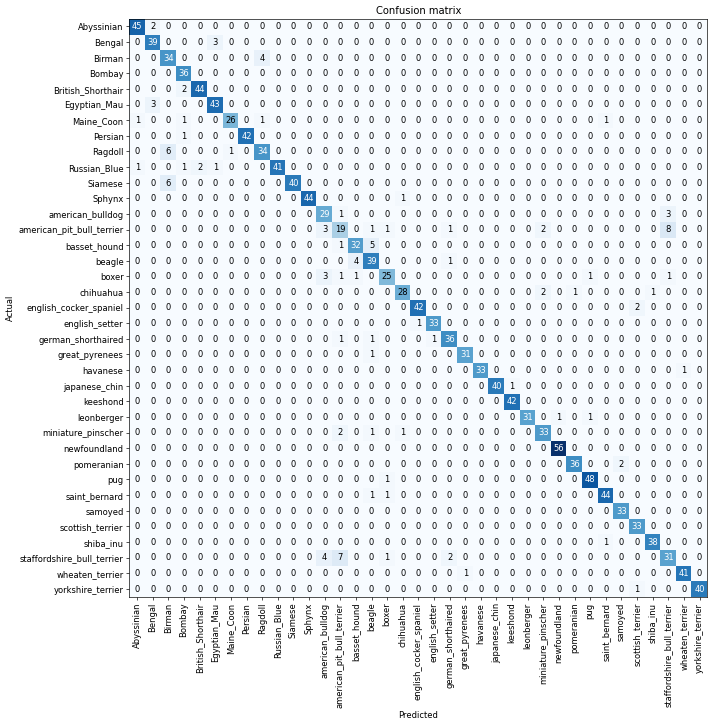

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.predict("/content/black-footed.jpg")

('Bengal',
 TensorBase(1),
 TensorBase([1.4289e-05, 7.3954e-01, 2.7698e-06, 2.5338e-05, 2.6532e-04,
             2.5739e-01, 3.6807e-04, 8.7553e-05, 1.1394e-05, 5.6411e-06,
             6.5393e-06, 1.5880e-05, 1.4766e-05, 5.6885e-05, 1.4018e-06,
             9.0851e-06, 8.8097e-06, 1.2801e-05, 1.1399e-05, 1.4132e-04,
             4.6439e-05, 8.9004e-06, 2.2079e-05, 3.9831e-05, 6.4935e-06,
             4.5461e-06, 1.1073e-05, 2.1612e-05, 5.4136e-06, 1.7159e-03,
             3.8110e-06, 7.4290e-06, 6.4444e-05, 1.5197e-06, 3.2839e-05,
             1.9432e-06, 1.7498e-05]))

In [ ]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Ragdoll', 'Birman', 6),
 ('Siamese', 'Birman', 6),
 ('basset_hound', 'beagle', 5)]

Bull Terriers are often confused with each other as well as Ragdoll and Birman breeds